### Answer the following Questions:

In the exercise folder, you will find a zip file called `outlierData.zip`. This zip file contains a training file called `trainOutlier.csv` and a test file called `test.csv`. This is a regression problem, and the target value is contained in the last column in each file. Read this data into your program.

1. **Build a model using `DecisionTreeRegressor` and assess the accuracy.**
2. **Identify any outliers in the training data using boxplots.**
3. **Remove the outliers and reassess the new accuracy of the model.**

Don’t worry about the Decision Tree regression model (we will cover them in the coming weeks).

For now, use the codes below (before/after you remove outliers):

```python
reg = DecisionTreeRegressor()
reg = reg.fit(train_features, train_labels)
print(reg.score(test_features, test_labels))

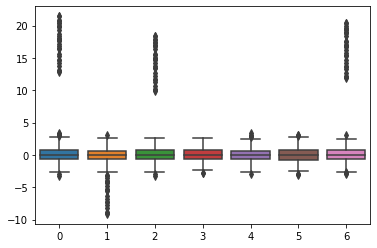

0.672608184499861


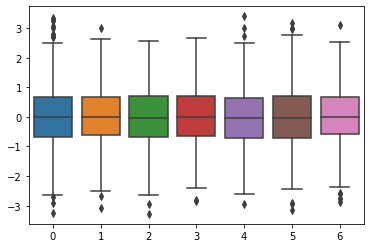

0.6861310753860475


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


def load_data(train_file, test_file):
    """
    Verileri CSV dosyalarından yükleyerek eğitim ve test veri setlerine ayırır.
    
    Args:
        train_file (str): Eğitim verisi dosya yolu.
        test_file (str): Test verisi dosya yolu.
    
    Returns:
        tuple: Eğitim ve test veri setleri (train_features, train_labels, test_features, test_labels).
    """
    # Eğitim ve test verilerini CSV'den yükle
    train_data = np.genfromtxt(train_file, delimiter=",")
    test_data = np.genfromtxt(test_file, delimiter=",")
    
    # Eğitim verisinden özellikleri (features) ve etiketleri (labels) ayır
    train_features = train_data[:, :-1]
    train_labels = train_data[:, -1]
    
    # Test verisinden özellikleri (features) ve etiketleri (labels) ayır
    test_features = test_data[:, :-1]
    test_labels = test_data[:, -1]
    
    return train_features, train_labels, test_features, test_labels


def plot_boxplot(features, title):
    """
    Özellikler (features) için boxplot çizimi yaparak aykırı değerleri görselleştirir.
    
    Args:
        features (numpy array): Görselleştirme için kullanılacak veri (özellikler).
        title (str): Grafiğin başlığı.
    """
    sns.boxplot(data=pd.DataFrame(features))
    plt.title(title)
    plt.show()


def train_decision_tree_regressor(train_features, train_labels, test_features, test_labels):
    """
    Karar Ağacı Regresyon modelini eğitip test setinde performansını ölçer.
    
    Args:
        train_features (numpy array): Eğitim verisindeki giriş özellikleri.
        train_labels (numpy array): Eğitim verisindeki hedef değişkenler.
        test_features (numpy array): Test verisindeki giriş özellikleri.
        test_labels (numpy array): Test verisindeki hedef değişkenler.
    
    Returns:
        float: Modelin test setindeki R^2 skoru.
    """
    # Karar Ağacı Regresyon Modeli
    regressor = DecisionTreeRegressor()
    regressor.fit(train_features, train_labels)
    
    # Test seti üzerinde R^2 skorunu döndür
    return regressor.score(test_features, test_labels)


def remove_outliers(features, labels, conditions):
    """
    Verilen koşullara göre aykırı değerleri veri setinden çıkarır.
    
    Args:
        features (numpy array): Giriş özellikleri (features).
        labels (numpy array): Hedef değişkenler (labels).
        conditions (list of tuples): Aykırı değerlerin belirlenmesi için kullanılacak koşullar.
                                     Her koşul bir sütun indeksi ve karşılaştırma (sınır) değerlerinden oluşur.
    
    Returns:
        tuple: Aykırı değerlerin çıkarıldığı giriş özellikleri ve hedef değişkenler (features, labels).
    """
    # Her koşulu sırayla uygulayarak aykırı değerleri temizle
    for condition in conditions:
        column_index, operator, threshold = condition
        
        if operator == "<":
            rows_to_keep = features[:, column_index] < threshold
        elif operator == ">":
            rows_to_keep = features[:, column_index] > threshold
        else:
            raise ValueError(f"Invalid operator: {operator}")
        
        features = features[rows_to_keep]
        labels = labels[rows_to_keep]
    
    return features, labels


def question3Outliers():
    """
    Aykırı değerlerin çıkarılmasının model performansına etkisini inceler:
    1. Eğitim ve test verilerini yükler.
    2. Aykırı değerleri tespit etmek için boxplot çizer.
    3. Aykırı değerler çıkarılmadan önce model eğitilir ve performansı ölçülür.
    4. Belirli koşullara göre aykırı değerler çıkarılır.
    5. Aykırı değerler çıkarıldıktan sonra tekrar model eğitilir ve performansı ölçülür.
    """
    # 1. Verilerin yüklenmesi
    train_features, train_labels, test_features, test_labels = load_data("trainOutlier.csv", "test.csv")
    
    # 2. Aykırı değerlerin tespiti (Boxplot)
    plot_boxplot(train_features, "Before Outlier Removal")
    
    # 3. Aykırı değerler çıkarılmadan önce model eğitimi ve performans skoru
    score_before = train_decision_tree_regressor(train_features, train_labels, test_features, test_labels)
    print(f"Score before outlier removal: {score_before}")
    
    # 4. Aykırı değerlerin çıkarılması (belirli koşullara göre)
    conditions = [
        (0, "<", 7.5),  # 1. sütun için 7.5'ten küçük olanları çıkar
        (1, ">", -5),   # 2. sütun için -5'ten büyük olanları çıkar
        (2, "<", 5),    # 3. sütun için 5'ten küçük olanları çıkar
        (6, "<", 7)     # 7. sütun için 7'den küçük olanları çıkar
    ]
    
    # Aykırı değerlerin çıkarılması
    train_features, train_labels = remove_outliers(train_features, train_labels, conditions)
    
    # 5. Aykırı değerler çıkarıldıktan sonra boxplot çizimi
    plot_boxplot(train_features, "After Outlier Removal")
    
    # 6. Aykırı değerler çıkarıldıktan sonra model eğitimi ve performans skoru
    score_after = train_decision_tree_regressor(train_features, train_labels, test_features, test_labels)
    print(f"Score after outlier removal: {score_after}")


def main():
    """
    Ana fonksiyon, aykırı değerlerin çıkarılmasının model performansına etkisini analiz eden
    question3Outliers fonksiyonunu çağırır.
    """
    question3Outliers()


# Programı başlat
if __name__ == "__main__":
    main()


### 1. İlk Boxplot (Aykırı Değerler Kaldırılmadan Önce)

Grafikte veride birçok sütunda önemli sayıda aykırı değer (outlier) mevcut. Bu değerler boxplot'un üst ve altındaki daireler olarak görünür. Özellikle 0, 1 ve 2. sütunlarda çok fazla aykırı değer dikkat çekiyor.

### 2. İkinci Boxplot (Aykırı Değerler Kaldırıldıktan Sonra)

Aykırı değerlerin kaldırılmasıyla verinin daha düzgün bir şekilde dağıldığı görülüyor. Artık uçlarda çok fazla aykırı değer yok ve veri daha dengeli bir yapıya sahip. Her sütundaki veriler daha merkezi ve aşırı uçlar daha az sayıda.

Bu sonuçlar, aykırı değerlerin çıkarılmasının veri setini daha temiz hale getirdiğini ve modelin daha sağlıklı bir şekilde öğrenmesine yardımcı olabileceğini gösteriyor. Aykırı değerlerin azalması, karar ağacı regresyon modelinin doğruluğunu artırabilir. Modelin performans skorlarının karşılaştırılmasından sonra aykırı değerlerin çıkarılmasının performansı nasıl etkilediğini analiz edebiliriz.